In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

from numpy.random import normal

import matplotlib
matplotlib.rcParams['font.size'] = 12

In [2]:
# データセット {x_n,y_n} (n=1...num) を用意
def create_dataset(num):
    dataset = DataFrame(columns=['x', 'y'])
    for i in range(num):
        x = float(i)/float(num-1)
        y = np.sin(2*np.pi*x) + normal(scale=0.3)
        dataset = dataset.append(Series([x, y], index=['x', 'y']),
                                 ignore_index=True)
    return dataset

def create_dataset2(num):
    dataset = DataFrame(columns=['x', 'y'])
    data =[[0.000000 ,-0.444100],
 [0.111111 , 0.813246],
 [0.222222 , 1.218738],
 [0.333333 , 0.558266],
 [0.444444 , 0.535728],
 [0.555556 ,-0.691942],
 [0.666667 ,-0.968823],
 [0.777778 ,-1.103438],
 [0.888889 ,-0.061476],
 [1.000000 ,-0.822059]]

    
    for d in data:
        x = d[0]
        y = d[1]
        dataset = dataset.append(Series([x, y], index=['x', 'y']),
                                 ignore_index=True)
    return dataset



In [3]:
N=10            # サンプルを取得する位置 x の個数
train_set = create_dataset2(N)
#train_set = create_dataset(N)
train_set

,x,y
0,0.000000,-0.444100
1,0.111111,0.813246
2,0.222222,1.218738
3,0.333333,0.558266
4,0.444444,0.535728
5,0.555556,-0.691942
6,0.666667,-0.968823
7,0.777778,-1.103438
8,0.888889,-0.061476
9,1.000000,-0.822059


In [4]:
train_set.x

0    0.000000
1    0.111111
2    0.222222
3    0.333333
4    0.444444
5    0.555556
6    0.666667
7    0.777778
8    0.888889
9    1.000000
Name: x, dtype: float64

In [16]:
c = 0
print("~~~~~")
for i in train_set:
    print(i)
    c += 1
    
print("===")
for i in range(0,N):
    print(train_set.x[i])

for index, line in train_set.iterrows():
    print("index=",index)
    print(line)
    #print("index=", index, "line=", line)



~~~~~
x
y
===
0.0
0.111111
0.222222
0.333333
0.444444
0.555556
0.666667
0.777778
0.888889
1.0
index= 0
x    0.0000
y   -0.4441
Name: 0, dtype: float64
index= 1
x    0.111111
y    0.813246
Name: 1, dtype: float64
index= 2
x    0.222222
y    1.218738
Name: 2, dtype: float64
index= 3
x    0.333333
y    0.558266
Name: 3, dtype: float64
index= 4
x    0.444444
y    0.535728
Name: 4, dtype: float64
index= 5
x    0.555556
y   -0.691942
Name: 5, dtype: float64
index= 6
x    0.666667
y   -0.968823
Name: 6, dtype: float64
index= 7
x    0.777778
y   -1.103438
Name: 7, dtype: float64
index= 8
x    0.888889
y   -0.061476
Name: 8, dtype: float64
index= 9
x    1.000000
y   -0.822059
Name: 9, dtype: float64


In [6]:
train_set.y

0   -0.444100
1    0.813246
2    1.218738
3    0.558266
4    0.535728
5   -0.691942
6   -0.968823
7   -1.103438
8   -0.061476
9   -0.822059
Name: y, dtype: float64

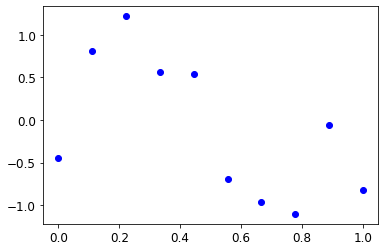

In [7]:
plt.scatter(train_set.x, train_set.y, marker='o', color='blue')

In [8]:
def show_result(subplot, train_set, m):
    f = resolve(train_set, m)
    subplot.set_xlim(-0.05, 1.05)
    subplot.set_ylim(-1.5, 1.5)
    subplot.set_title("M=%d" % m, fontsize=10)

    # トレーニングセットを表示
    subplot.scatter(train_set.x, train_set.y, marker='o',
                    color='blue', label=None)

    # 真の曲線を表示
    linex = np.linspace(0, 1, 101)
    liney = np.sin(2*np.pi*linex)
    subplot.plot(linex, liney, color='green', linestyle='--')

    # 多項式近似の曲線を表示
    linex = np.linspace(0, 1, 101)
    liney = f(linex)
    label = "E(RMS)=%.2f" % rms_error(train_set, f)
    subplot.plot(linex, liney, color='red', label=label)
    subplot.legend(loc=1, fontsize=10)

In [9]:
#トレーニングセットのベクトル(縦ベクトル)の成分を計算する
#train_set(DataFrame): トレーニングデータセット
#m: xの次元( Σtn * xn ** m)
def train_vec_elem_aux(train_set, m):
    sum = 0
    c = 0
    for y in train_set.y:
        sum = sum + train_set.y[c] * (train_set.x[c] ** m)
        c += 1
    return sum

#トレーニングセットのベクトル（縦ベクトル）を求める
#train_set(DataFrame): トレーニングデータセット
#m: 求める多項式の次数
def train_vec(train_set, m):
    v = DataFrame(columns=['x'])
    for mm in range(0, m):
        data = train_vec_elem_aux(train_set, mm)
        v = v.append(Series([data], index=['x']),ignore_index=True)
    return v

#φ行列の各縦ベクトルの各成分を計算する
#train_set(DataFrame)：トレーニングデータセット
#m:乗数
def phai_vec_elem_aux(train_set, m):
    sum = 0
    for x in train_set.x:
        sum = sum + x ** m
    return sum

#φ行列の各縦ベクトルの各成分を計算する
#train_set(DataFrame)：トレーニングデータセット
#ms:開始の乗数の数 
#me:終了の乗数の数+1
def phai_vec_elem(train_set, ms, me):
    v = DataFrame(columns=['x'])
    for mm in range(ms, me):
        data = phai_vec_elem_aux(train_set, mm)
        v = v.append(Series([data], index=['x']),ignore_index=True)
    return v

#φ行列を計算する
#多項式の次数+1
def calc_phai(train_set, m):
    p = DataFrame()
    for mm in range(0, m):
        print("~~~ a,b~~~~", 0 + mm, m + mm)
        p_ = phai_vec_elem(train_set, 0 + mm, m + mm)
        p = pd.concat([p, p_], axis=1)
    return p
    

# 最小二乗法で解を求める
def resolve(dataset, m):
    print("[START] RESOLVE")

    phi = calc_phai(dataset, m)
    t = train_vec(dataset, m)
    phi_inv = np.linalg.inv(phi)
    ws = np.dot(phi_inv, t)
    
    print("=====WS ====")
    print(ws)

    def f(x):
        y = 0
        for i, w in enumerate(ws):
            y += w * (x ** i)
        return y
    print("[END] RESOLVE")
    return f

In [10]:
#test
print("==== TRAIN DATA SET====")
print(train_set)
print("=== N ===")
print(N)

print("==== train_vec_elem_aux ====") #→ＯＫ
print(train_vec_elem_aux(train_set, 0))
print(train_vec_elem_aux(train_set, 1))
print(train_vec_elem_aux(train_set, 2))
print(train_vec_elem_aux(train_set, 3))

print("==== train vec ==== ") #-> OK
print(train_vec(train_set, N))

print("=== phai_vec_elem_aux === ") #-> OK
print(phai_vec_elem_aux(train_set, 0 ))
print(phai_vec_elem_aux(train_set, 1 ))
print(phai_vec_elem_aux(train_set, 2 ))
print(phai_vec_elem_aux(train_set, 3 ))

print("==== phai_vec_elem ==== ") #-> OK
print(phai_vec_elem(train_set,0,N))
print(phai_vec_elem(train_set,1,N+1))

print("==== train vec ==== ") #-> OK
print(train_vec(train_set, N))
print("=== phai ==== ")#-> OK
print(calc_phai(train_set, N))




==== TRAIN DATA SET====
          x         y
0  0.000000 -0.444100
1  0.111111  0.813246
2  0.222222  1.218738
3  0.333333  0.558266
4  0.444444  0.535728
5  0.555556 -0.691942
6  0.666667 -0.968823
7  0.777778 -1.103438
8  0.888889 -0.061476
9  1.000000 -0.822059
=== N ===
10
==== train_vec_elem_aux ====
-0.9658599999999997
-1.979848445669
-1.944219456835469
-1.7079185026946848
==== train vec ==== 
          x
0 -0.965860
1 -1.979848
2 -1.944219
3 -1.707919
4 -1.490638
5 -1.322183
6 -1.197015
7 -1.104889
8 -1.036964
9 -0.986588
=== phai_vec_elem_aux === 
10.0
5.0
3.51851925926
2.77777888889
==== phai_vec_elem ==== 
           x
0  10.000000
1   5.000000
2   3.518519
3   2.777779
4   2.336993
5   2.046183
6   1.841043
7   1.689417
8   1.573439
9   1.482382
          x
0  5.000000
1  3.518519
2  2.777779
3  2.336993
4  2.046183
5  1.841043
6  1.689417
7  1.573439
8  1.482382
9  1.409420
==== train vec ==== 
          x
0 -0.965860
1 -1.979848
2 -1.944219
3 -1.707919
4 -1.490638
5 -1.32

In [11]:
# 平方根平均二乗誤差（Root mean square error）を計算
def rms_error(dataset, f):
    err = 0.0
    for index, line in dataset.iterrows():
        x, y = line.x, line.y
        err += 0.5 * (y - f(x))**2
    return np.sqrt(2 * err / len(dataset))

[START] RESOLVE
~~~ a,b~~~~ 0 1
=====WS ====
[[-0.096586]]
[END] RESOLVE
[START] RESOLVE
~~~ a,b~~~~ 0 2
~~~ a,b~~~~ 1 3
=====WS ====
[[ 0.63826434]
 [-1.46970068]]
[END] RESOLVE
[START] RESOLVE
~~~ a,b~~~~ 0 3
~~~ a,b~~~~ 1 4
~~~ a,b~~~~ 2 5
=====WS ====
[[ 0.44043782]
 [-0.134371  ]
 [-1.33532968]]
[END] RESOLVE
[START] RESOLVE
~~~ a,b~~~~ 0 4
~~~ a,b~~~~ 1 5
~~~ a,b~~~~ 2 6
~~~ a,b~~~~ 3 7
=====WS ====
[[ -0.24350535]
 [ 11.12626036]
 [-31.01356477]
 [ 19.78549006]]
[END] RESOLVE
[START] RESOLVE
~~~ a,b~~~~ 0 5
~~~ a,b~~~~ 1 6
~~~ a,b~~~~ 2 7
~~~ a,b~~~~ 3 8
~~~ a,b~~~~ 4 9
=====WS ====
[[ -0.5288206 ]
 [ 21.82558025]
 [-85.04514037]
 [106.45000148]
 [-43.33225571]]
[END] RESOLVE
[START] RESOLVE
~~~ a,b~~~~ 0 6
~~~ a,b~~~~ 1 7
~~~ a,b~~~~ 2 8
~~~ a,b~~~~ 3 9
~~~ a,b~~~~ 4 10
~~~ a,b~~~~ 5 11
=====WS ====
[[  -0.40183761]
 [  10.25744893]
 [  11.38239598]
 [-166.11849047]
 [ 269.09294586]
 [-124.97008063]]
[END] RESOLVE
[START] RESOLVE
~~~ a,b~~~~ 0 7
~~~ a,b~~~~ 1 8
~~~ a,b~~~~ 2 9


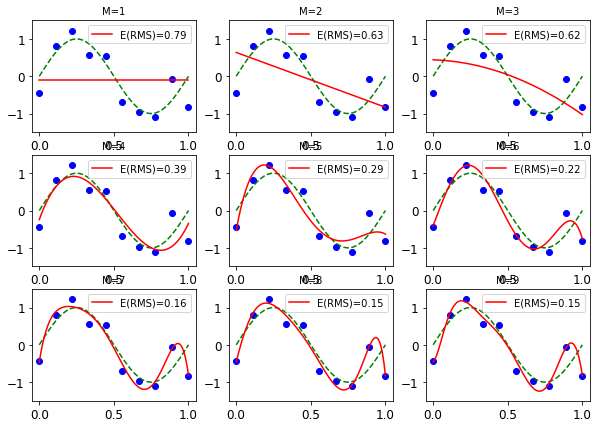

In [12]:
fig = plt.figure(figsize=(10, 7))
#for i, m in enumerate([10]):
#for i, m in enumerate([0,1, 3, 9]):
for i, m in enumerate([1, 2, 3 ,4 ,5 ,6 ,7 ,8 ,9]):
    subplot = fig.add_subplot(3, 3, i+1)
    show_result(subplot, train_set, m)